# Visualization of CatBoost decision trees tutorial

In [1]:
import numpy as np
import catboost
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

#### Load boston dataset from sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
y = boston['target']
X = boston['data']

In [4]:
pool = catboost.Pool(
    data=X, 
    label=y
)

Create and fit CatBoost model with trees of depth 2.

In [5]:
model = CatBoostRegressor(depth=2, verbose=False, iterations=1).fit(X, y)

Currently only symmetric trees can be visualized.

Let's consider symmetric decision tree. In such tree only one feature is used to build all splits at each tree level. There are three types of splits: "FloatFeature", "OneHotFeature" and "OnlineCtr". Model without categorical features contains only "FloatFeature" splits.

In visualised tree each node represents one split. Since there are three types of splits there are three types of tree nodes.

#### FloatFeature
Let's look at the first tree of our model.

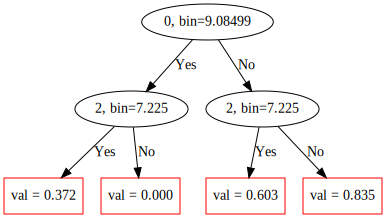

In [6]:
model.plot_tree(tree_idx=0, pool=pool)

Our model doesn't have categorical features, so there are only "FloatFeature" nodes in visualised tree.
Node corresponding to "FloatFeature" split contains feature index and border value, which are used to split objects.

In this example, the node of depth 0 shows that objects are splitted by their 0th feature with border value $9.08499$. Analogously, nodes of depth 1 split objects by their 2nd feature with border value $7.225$.

#### OneHotFeature

We will use `catboost.datasets.titanic` dataset, which contains categorical data.

In [7]:
from catboost.datasets import titanic
titanic_df = titanic()

X = titanic_df[0].drop('Survived',axis=1)
y = titanic_df[0].Survived

In [8]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Processing NaN values in categorical features.

In [9]:
is_cat = (X.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=1234)
pool = Pool(X_train, y_train, cat_features=cat_features_index, feature_names=list(X.columns))

Define and fit CatBoost model

In [12]:
model = CatBoostClassifier(max_depth=2, verbose=False, max_ctr_complexity=1, random_seed=42, iterations=2).fit(pool)

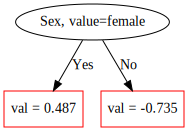

In [13]:
model.plot_tree(tree_idx=0, pool=pool)

The first tree contains only one split made by "OneHotFeature" `Sex`. This split puts objects with `Sex=female` to the left and other objects to the right.

#### OnlineCtr features

Let's look at other trees, which contain "OnlineCtr" splits.

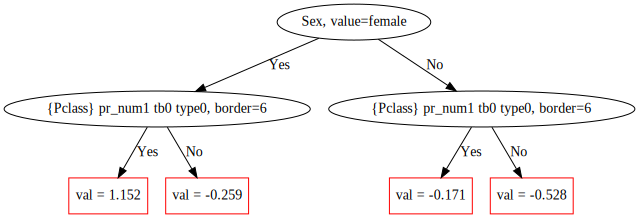

In [14]:
model.plot_tree(tree_idx=1, pool=pool)

The node of depth 0 corresponds to "OnlineCtr" split. This split is made by one feature `Pclass`.